In [4]:
import os
import sklearn
import numpy as np
import matplotlib  as mpl
import matplotlib .pyplot as plt

#To make the notebook's output stable across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path for saving images 
IMAGES_PATH = os.path.join("images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Section: Linear Regression

In chapter 1, the regression model of life satisfaction was - <strong>life_satisfaction</strong> = <strong>theta[0]</strong> + <strong>theta[1]</strong> * <strong>GDP_per_capita</strong>. A linear function where <strong>theta[0]</strong> and <strong>theta[1]</strong> are the models hyperparameters and <strong>GDP_per_capita</strong> is the input feature

In other words, it makes a prediction by computing a weighted sum of the input features + a constant called the bias term (theta0)

Vectorized equation of Linear Regression

<img src="images/Linear regression - vectorized equation.png">

<ul>
    <li>
<strong>theta</strong> is the models parameter vector, containing the bias term <strong>theta[0]</strong> and the feature weights <strong>theta[1]</strong> to <strong>thetan</strong>
    </li>
    <li><strong>x</strong> is the instances feature vector, containing <strong>x[0]</strong> to <strong>x[n]</strong>, with <strong>x0</strong> always equal to 1</li>
    <li><strong>theta*x</strong> is the dot product of <strong>theta</strong> and <strong>x</strong></li>
    <li><strong>h0</strong> is the hypothesis function, using the model parameters <strong>theta</strong></li>
</ul>

When we train a model, we want it to best fit the training set. We do this by measuring it's performance with the mean squared error (MSE). So, we need to find the value of <strong>theta</strong> that minimizes MSE.

Mean squared error equation

<img src="images/Mean squared error equation.png">

##### The normal equation

The <em>closed form solution</em> which gives us the result of minimizing the cost function is called <em>Normal Equation</em>

<img src="images/Normal equation.png">

<ul>
    <li><strong>theta_hat</strong> is the value of <strong>theta</strong> that minimizes the cost function</li>
    <li><strong>y</strong> is the vector of target values containing <strong>y[1]</strong> to <strong>y[m]</strong></li>
</ul>

Use numpy to test the equation

In [2]:
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.rand(100, 1)

Saving figure generated_data_plot


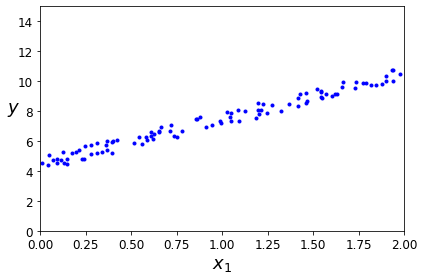

In [5]:
#Plot the values
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()